In [1]:
from utils import mnist_reader
import numpy as np
import tflearn

%matplotlib inline

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

In [4]:
y_train.shape

(60000,)

In [5]:
from skimage import io

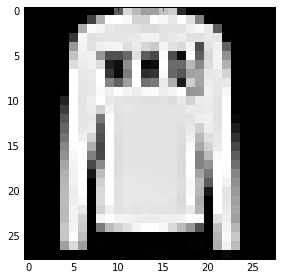

In [6]:
io.imshow(X_train[1666].reshape(-1 , 28))

In [5]:
from tflearn.layers.core import input_data, dropout, fully_connected , one_hot_encoding
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression

In [8]:
y_train[123]

2

In [9]:
from sklearn import preprocessing

In [10]:
enc = preprocessing.OneHotEncoder()

In [11]:
enc.fit(y_train)

/root/anaconda2/envs/tensor/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


OneHotEncoder(categorical_features='all', dtype=<type 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [12]:
enc.n_values_

array([10,  1,  1, ...,  4,  1,  6])

In [6]:
X_train = X_train.reshape([-1 , 28 , 28 , 1])

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
# Building 'VGG Network'
network = input_data(shape=[None, 28 , 28 , 1])

network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 128, 3, activation='relu')
network = conv_2d(network, 128, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = conv_2d(network, 256, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = conv_2d(network, 512, 3, activation='relu')
network = max_pool_2d(network, 2, strides=2)

network = fully_connected(network, 4096, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 4096, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')

network = regression(network, optimizer='rmsprop',
                     loss='categorical_crossentropy',
                     to_one_hot = True , 
                     n_classes = 10 , 
                     learning_rate=0.0001)

In [9]:
model = tflearn.DNN(network, checkpoint_path='./models/model_vgg',
                    max_checkpoints=1, tensorboard_verbose=2 , tensorboard_dir = "./logs/")

In [13]:
model.fit(X_train, y_train, n_epoch=10, shuffle=True,
          show_metric=True, batch_size=40, snapshot_step=500,
          snapshot_epoch=False, run_id='vgg_oxflowers17')

Training Step: 14999  | total loss: 0.18761 | time: 1159.911s
| RMSProp | epoch: 010 | loss: 0.18761 - acc: 0.9382 -- iter: 59960/60000
Training Step: 15000  | total loss: 0.19531 | time: 1160.681s
| RMSProp | epoch: 010 | loss: 0.19531 - acc: 0.9319 -- iter: 60000/60000
--


In [10]:
model.load("./models/fashion_mnist.tflearn")

INFO:tensorflow:Restoring parameters from /root/fashion-mnist/models/fashion_mnist.tflearn


In [11]:
X_test = X_test.reshape([-1 , 28 , 28 , 1])
y_pred = model.predict(X_test[:8000])

In [12]:
import cPickle as pickle
y_pred_alex = pickle.load(open("y_pred.dat" , "rb"))

In [37]:
X_test.shape

(10000, 28, 28, 1)

In [14]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred.shape

(8000, 10)

In [17]:
from sklearn import preprocessing

In [18]:
le = preprocessing.LabelEncoder()

In [19]:
le.fit_transform(y_test)

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
np.argmax(y_pred[0])

9

In [26]:
help(np.argmax)

Help on function argmax in module numpy.core.fromnumeric:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    
    Notes
    -----
    In case of multiple occurrences of the maximum values, the indices
    corresponding to the first occurrence ar

In [39]:
sum(np.argmax(y_pred , axis=1) == y_test[:8000])/8000.0

0.90749999999999997

In [13]:
sum(np.argmax(y_pred_alex , axis=1) == y_test[:8000])/8000.0

0.877

In [14]:
y_comb =( y_pred + y_pred_alex) / 2

In [15]:
sum(np.argmax(y_comb , axis=1) == y_test[:8000])/8000.0

0.91100000000000003